#ANHA4 Tracer Simulation Results

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [9]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary_ANHA4.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary']
domain = Boundary_Mat['domain'].T

In [4]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = MAT['Ba_ini_ANHA4']

In [16]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP27_5d_20100101_20100226_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [10]:
L = 0
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

# NaN bottom-up pattern

```fortran
CALL lbc_lnk( trn(:,:,:,jpmyt1), 'T', 1. )
CALL lbc_lnk( trb(:,:,:,jpmyt1), 'T', 1. )
CALL lbc_lnk( tra(:,:,:,jpmyt1), 'T', 1. )
```

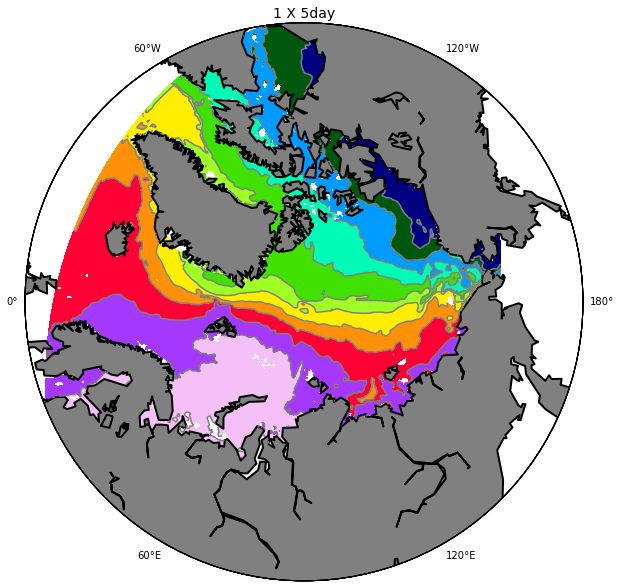

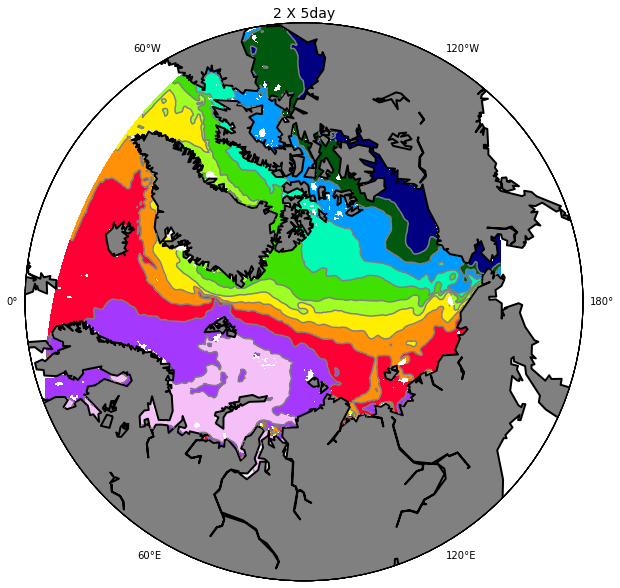

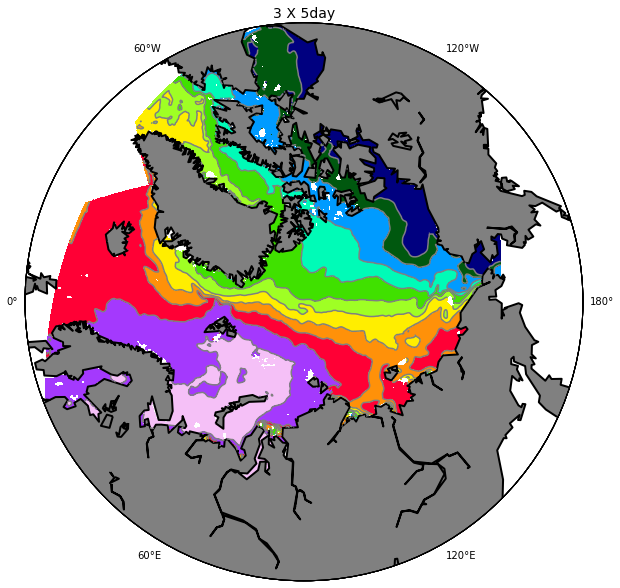

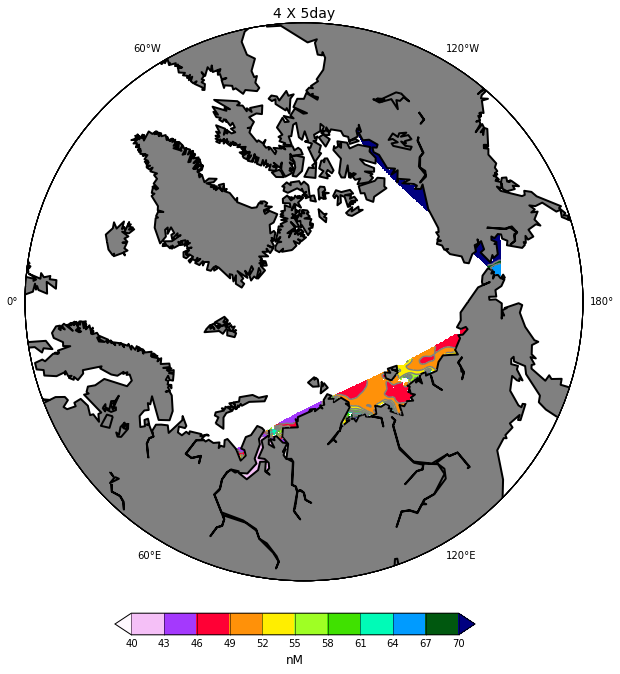

In [36]:
for i in range(4):
    Ba_mask = np.ma.masked_where(((domain==0) | (Ba[i, L, :, :]==0)), Ba[i, L, :, :])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()

    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_mask, lev1, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.contour(x, y, Ba_mask, lev1, linewidths=1.5, colors=('gray',))
    ax.set_title(str(i+1)+' X 5day', fontsize=14)

# CBar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev1)

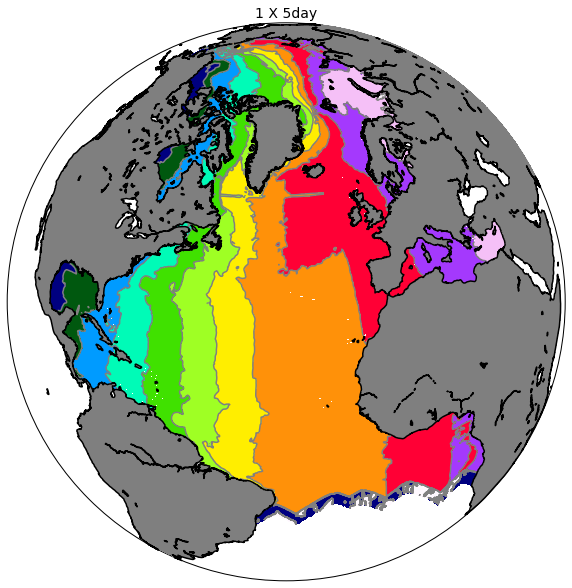

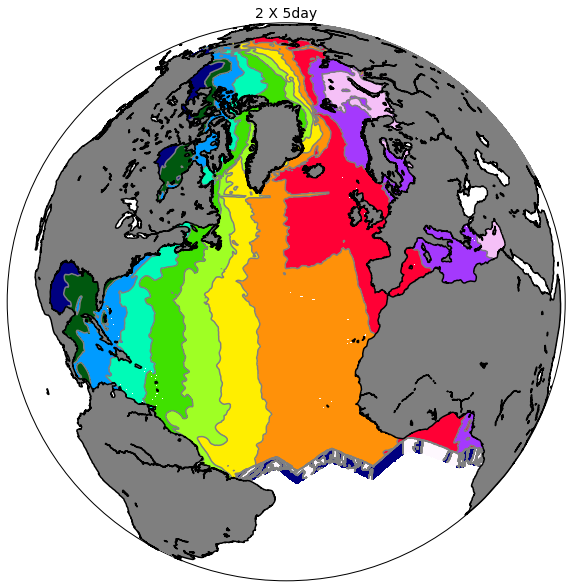

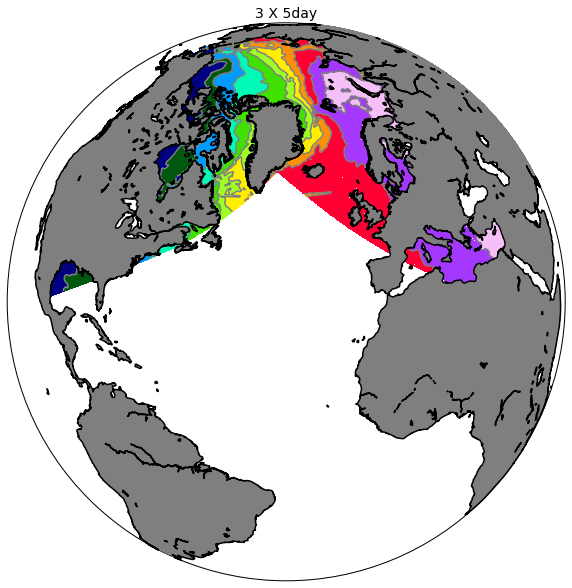

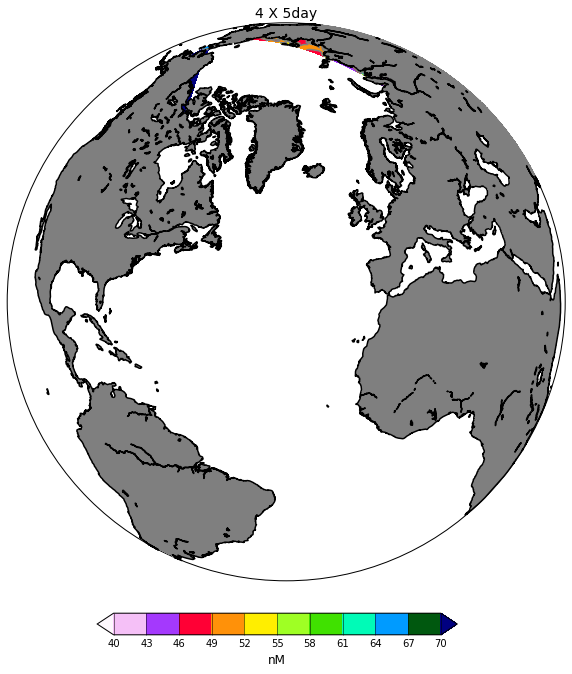

In [37]:
for i in range(4):
    Ba_mask = np.ma.masked_where(Ba[i, L, :, :]==0, Ba[i, L, :, :])
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()

    proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_mask, lev1, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.contour(x, y, Ba_mask, lev1, linewidths=1.5, colors=('gray',))
    ax.set_title(str(i+1)+' X 5day', fontsize=14)

# CBar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev1)